In [1]:
import scipy

In [2]:
def csr_row_set_nz_to_val(csr, row, value=0):
    """Set all nonzero elements (elements currently in the sparsity pattern)
    to the given value. Useful to set to 0 mostly.
    """
    if not isinstance(csr, scipy.sparse.csr_matrix):
        raise ValueError('Matrix given must be of CSR format.')
    csr.data[csr.indptr[row]:csr.indptr[row+1]] = value
    return csr

In [3]:
def csr_col_set_nz_to_val(csr, col, value=0):
    """Set all nonzero elements (elements currently in the sparsity pattern)
    to the given value. Useful to set to 0 mostly.
    """
    if not isinstance(csr, scipy.sparse.csc_matrix):
        raise ValueError('Matrix given must be of CSC format.')
    csr.data[csr.indptr[col]:csr.indptr[col+1]] = value

In [4]:
import scipy.sparse

def zero_rows(M, rows):
    diag = scipy.sparse.eye(M.shape[0]).tocsr()
    for r in rows:
        diag[r, r] = 0
    return diag.dot(M)

def zero_columns(M, columns):
    diag = scipy.sparse.eye(M.shape[1]).tocsr()
    for c in columns:
        diag[c, c] = 0
    return M.dot(diag)


In [5]:
from networkx.algorithms import bipartite
import networkx as nx
#random_graph(n, m, p[, seed, directed])
n = 20
m = 20
p = 0.6
seed = 1
directed = False
G = bipartite.random_graph(n, m, p, seed, directed)
import scipy.sparse as sps
# Convert the graph to a SciPy sparse matrix
mat = nx.to_scipy_sparse_array(G,format="lil")
mat.setdiag(1)
print(mat.shape)

(40, 40)


In [6]:
from scipy.sparse import triu, tril
# Set diagonal to 1 so matrix is invertible
# Extract upper triangle of symmetric sparse matrix
upper_triangle = triu(mat, format="csc")
lower_triangle = tril(mat,format="csc")
mat=upper_triangle
print(mat.shape)

(40, 40)


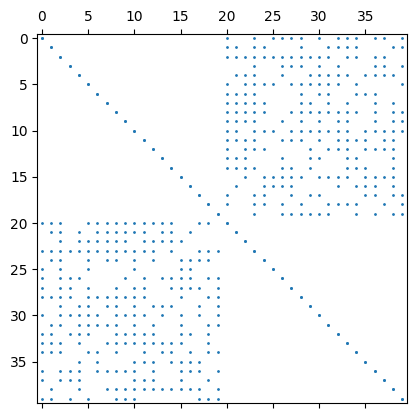

In [7]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(upper_triangle, aspect='equal', marker='.', markersize=2)
plt.spy(lower_triangle, aspect='equal', marker='.', markersize=2)


In [8]:
col=0
print(lower_triangle)
csr_row_set_nz_to_val(lower_triangle.tocsr(), 0)
csr_col_set_nz_to_val(lower_triangle, 0)
lower_triangle=csr_row_set_nz_to_val(lower_triangle.tocsr(), 20).tocsc()
csr_col_set_nz_to_val(lower_triangle, 0)
print(lower_triangle)

  (0, 0)	1
  (20, 0)	1
  (23, 0)	1
  (25, 0)	1
  (26, 0)	1
  (27, 0)	1
  (28, 0)	1
  (30, 0)	1
  (32, 0)	1
  (33, 0)	1
  (34, 0)	1
  (36, 0)	1
  (37, 0)	1
  (39, 0)	1
  (1, 1)	1
  (20, 1)	1
  (21, 1)	1
  (23, 1)	1
  (24, 1)	1
  (28, 1)	1
  (31, 1)	1
  (32, 1)	1
  (33, 1)	1
  (34, 1)	1
  (38, 1)	1
  :	:
  (31, 19)	1
  (34, 19)	1
  (36, 19)	1
  (38, 19)	1
  (39, 19)	1
  (20, 20)	1
  (21, 21)	1
  (22, 22)	1
  (23, 23)	1
  (24, 24)	1
  (25, 25)	1
  (26, 26)	1
  (27, 27)	1
  (28, 28)	1
  (29, 29)	1
  (30, 30)	1
  (31, 31)	1
  (32, 32)	1
  (33, 33)	1
  (34, 34)	1
  (35, 35)	1
  (36, 36)	1
  (37, 37)	1
  (38, 38)	1
  (39, 39)	1
  (0, 0)	0
  (20, 0)	0
  (23, 0)	0
  (25, 0)	0
  (26, 0)	0
  (27, 0)	0
  (28, 0)	0
  (30, 0)	0
  (32, 0)	0
  (33, 0)	0
  (34, 0)	0
  (36, 0)	0
  (37, 0)	0
  (39, 0)	0
  (1, 1)	1
  (20, 1)	0
  (21, 1)	1
  (23, 1)	1
  (24, 1)	1
  (28, 1)	1
  (31, 1)	1
  (32, 1)	1
  (33, 1)	1
  (34, 1)	1
  (38, 1)	1
  :	:
  (31, 19)	1
  (34, 19)	1
  (36, 19)	1
  (38, 19)	1
  (39, 19)	1
  

In [9]:
import time
import numpy as np
start_time = time.time()
# Set the data array in place to random integers between 0 and nnz
mat.data = np.random.randint(1, mat.nnz + 1, size=mat.nnz)
# Record the stop time
stop_time = time.time()
# Calculate the elapsed time
elapsed_time = stop_time - start_time
print(f"Randomized Adj in {elapsed_time} seconds")
start_time = time.time()
invMat = sps.linalg.inv(upper_triangle)
# Record the stop time
stop_time = time.time()
# Calculate the elapsed time
elapsed_time = stop_time - start_time
print(f"Inverted Matrix in {elapsed_time} seconds")
matBackup=mat.copy()
invMat.setdiag(0)
invMatBackup=invMat.copy()


Randomized Adj in 0.0005159378051757812 seconds
Inverted Matrix in 0.012083768844604492 seconds


In [10]:
print(mat)
print(invMat)

  (0, 0)	175
  (1, 1)	13
  (2, 2)	43
  (3, 3)	24
  (4, 4)	280
  (5, 5)	137
  (6, 6)	37
  (7, 7)	67
  (8, 8)	28
  (9, 9)	142
  (10, 10)	37
  (11, 11)	227
  (12, 12)	188
  (13, 13)	251
  (14, 14)	216
  (15, 15)	129
  (16, 16)	238
  (17, 17)	84
  (18, 18)	186
  (19, 19)	221
  (0, 20)	241
  (1, 20)	102
  (2, 20)	205
  (5, 20)	115
  (6, 20)	93
  :	:
  (4, 38)	151
  (7, 38)	122
  (8, 38)	53
  (9, 38)	81
  (10, 38)	189
  (11, 38)	82
  (12, 38)	206
  (13, 38)	10
  (14, 38)	162
  (15, 38)	167
  (16, 38)	223
  (17, 38)	76
  (19, 38)	232
  (38, 38)	65
  (0, 39)	81
  (1, 39)	136
  (3, 39)	243
  (5, 39)	60
  (8, 39)	252
  (9, 39)	184
  (10, 39)	25
  (17, 39)	114
  (18, 39)	275
  (19, 39)	205
  (39, 39)	26
  (0, 0)	0.0
  (1, 1)	0.0
  (2, 2)	0.0
  (3, 3)	0.0
  (4, 4)	0.0
  (5, 5)	0.0
  (6, 6)	0.0
  (7, 7)	0.0
  (8, 8)	0.0
  (9, 9)	0.0
  (10, 10)	0.0
  (11, 11)	0.0
  (12, 12)	0.0
  (13, 13)	0.0
  (14, 14)	0.0
  (15, 15)	0.0
  (16, 16)	0.0
  (17, 17)	0.0
  (18, 18)	0.0
  (19, 19)	0.0
  (0, 20)	-0.01721

In [11]:
import numpy as np
import time
import networkx as nx

def GaussMatchingDOK(G):
    # Generate a random graph
    # Record the start time
    # Convert the graph to a SciPy sparse matrix
    start_time = time.time()
    mat = nx.to_scipy_sparse_array(G,format="lil")
    mat.setdiag(1)
    mat = tril(mat,format="csc")
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Convert the graph to a SciPy sparse matrix in {elapsed_time} seconds")
    #print(mat.shape)
    # Set the random seed to 13
    np.random.seed(13)
    # Get the number of non-zero elements (nnz) in the matrix
    nnz = mat.nnz
    # Generate a random graph
    # Record the start time
    start_time = time.time()
    # Set the data array in place to random integers between 0 and nnz
    mat.data = np.random.randint(1, nnz + 1, size=nnz)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Randomized Adj in {elapsed_time} seconds")
    start_time = time.time()
    invMat = sps.linalg.inv(mat)
    invMat.setdiag(0)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Inverted Matrix in {elapsed_time} seconds")
    mat.setdiag(1)
    # Record the start time
    start_time = time.time()
    dokMat = mat.todok()
    dokInvMat = invMat.todok()
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Converted to dokMat in {elapsed_time} seconds")
    gausmatching = []
    # Record the start time
    start_time = time.time()
    for c in range(dokInvMat.shape[0]):
        #print("C",c)
        for row_idx in range(dokInvMat.shape[0]):
            if (dokInvMat.get((row_idx,c)) != 0.0 and dokMat.get((row_idx,c)) != 0.0):
                # Removing rth row
                dokInvMat[row_idx, :]=0.0
                # Removing cth column
                dokInvMat[:, c]=0.0
                # Removing cth row
                dokInvMat[c, :]=0.0
                # Removing cth column
                dokInvMat[:, row_idx]=0.0
                gausmatching.append((row_idx,c))
                #print("matched",c,row_idx)
                break
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Found Matching in {elapsed_time} seconds")
    return gausmatching

In [12]:
import numpy as np
import time
import networkx as nx

def GaussMatchingSparse(G):
    # Generate a random graph
    # Record the start time
    # Convert the graph to a SciPy sparse matrix
    start_time = time.time()
    mat = nx.to_scipy_sparse_array(G,format="lil")
    mat.setdiag(1)
    mat = tril(mat,format="csc")
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Convert the graph to a SciPy sparse matrix in {elapsed_time} seconds")
    #print(mat.shape)
    # Set the random seed to 13
    np.random.seed(13)
    # Get the number of non-zero elements (nnz) in the matrix
    nnz = mat.nnz
    # Generate a random graph
    # Record the start time
    start_time = time.time()
    # Set the data array in place to random integers between 0 and nnz
    mat.data = np.random.randint(1, nnz + 1, size=nnz)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Randomized Adj in {elapsed_time} seconds")
    start_time = time.time()
    invMat = sps.linalg.inv(mat)
    invMat.setdiag(0)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Inverted Matrix in {elapsed_time} seconds")
    mat.setdiag(1)

    gausmatching = []
    # Record the start time
    start_time = time.time()
    for c in range(invMat.shape[0]):
        #print("C",c)
        for column_index in range(invMat.shape[0]):
            # Iterate over the rows in the specified column
            for row in range(invMat.indptr[column_index], invMat.indptr[column_index + 1]):
                row_index = invMat.indices[row]
                value = invMat.data[row]
                if (value != 0.0):
                    #print(f"Row {row_index}, Column {column_index}: Value {value}")
                    csr_col_set_nz_to_val(invMat, column_index)
                    invMat=csr_row_set_nz_to_val(invMat.tocsr(), row_index).tocsc()
                    gausmatching.append((row_index,column_index))
                    break

    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Found Matching in {elapsed_time} seconds")
    return gausmatching

In [13]:
import numpy as np
import time
import networkx as nx

def GaussMatchingSparseNumpy(G):
    # Generate a random graph
    # Record the start time
    # Convert the graph to a SciPy sparse matrix
    start_time = time.time()
    mat = nx.to_scipy_sparse_array(G,format="lil")
    mat.setdiag(1)
    mat = tril(mat,format="csc")
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Convert the graph to a SciPy sparse matrix in {elapsed_time} seconds")
    #print(mat.shape)
    # Set the random seed to 13
    np.random.seed(13)
    # Get the number of non-zero elements (nnz) in the matrix
    nnz = mat.nnz
    # Generate a random graph
    # Record the start time
    start_time = time.time()
    # Set the data array in place to random integers between 0 and nnz
    mat.data = np.random.randint(1, nnz + 1, size=nnz)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Randomized Adj in {elapsed_time} seconds")
    start_time = time.time()
    invMat = sps.linalg.inv(mat)
    invMat.setdiag(0)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Inverted Matrix in {elapsed_time} seconds")

    start_time = time.time()
    
    # Create a binary mask for non-zero elements
    non_zero_mask = invMat != 0.0
    
    # Find row and column indices of non-zero elements
    row_indices, col_indices = non_zero_mask.nonzero()
    
    # Create a set of row and column indices for quick look-up
    row_set = set(row_indices)
    col_set = set(col_indices)
    
    matching = []
    
    for c in range(invMat.shape[1]):
        for row_idx in range(invMat.shape[0]):
            if row_idx in row_set and c in col_set:
                # Non-zero element found, add it to the matching
                matching.append((row_idx, c))
                # Remove the row and column from the sets
                row_set.remove(row_idx)
                col_set.remove(c)
                break
    
    stop_time = time.time()
    elapsed_time = stop_time - start_time
    print(f"Found Matching in {elapsed_time} seconds")
    
    return matching

In [14]:
GaussMatchingSparseNumpy(G)

Convert the graph to a SciPy sparse matrix in 0.0016694068908691406 seconds
Randomized Adj in 5.459785461425781e-05 seconds
Inverted Matrix in 0.015360593795776367 seconds
Found Matching in 0.0005373954772949219 seconds


[(20, 0),
 (21, 1),
 (22, 2),
 (23, 3),
 (24, 4),
 (25, 5),
 (26, 6),
 (27, 7),
 (28, 8),
 (29, 9),
 (30, 10),
 (31, 11),
 (32, 12),
 (33, 13),
 (34, 14),
 (35, 15),
 (36, 16),
 (37, 17),
 (38, 18),
 (39, 19)]

In [16]:
from networkx.algorithms import bipartite
import networkx as nx
import timeit
import time
# Wrap the code in a loop to increase n by powers of 10
for exponent in range(1, 4):  # Increase n by powers of 10 (1 to 4)
    n = 10 ** exponent
    m = n
    p = 0.6
    seed = 1
    directed = False
    
    # Generate a random graph
    # Record the start time
    start_time = time.time()
    G = nx.bipartite.random_graph(n, m, p, seed, directed)
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Generated Bipartite Graph in {elapsed_time} seconds")
    # Convert the graph to a SciPy sparse matrix
    start_time = time.time()

    mat = nx.to_scipy_sparse_array(G, format="csc")
    # Record the stop time
    stop_time = time.time()
    # Calculate the elapsed time
    elapsed_time = stop_time - start_time
    print(f"Convert the graph to a SciPy sparse matrix in {elapsed_time} seconds")
    # Wrap the gaussmatching method in a timeit function to get average time
    def time_GaussDOK():
        return GaussMatchingDOK(G)
    def time_GaussSparse():
        return GaussMatchingSparseNumpy(G)
    # Wrap the gaussmatching method in a timeit function to get average time
    def time_Edmonds():
        return nx.max_weight_matching(G, maxcardinality=True)
    Gauss = GaussMatchingSparseNumpy(G)
    Edmonds = nx.max_weight_matching(G, maxcardinality=True)
    assert(len(Gauss)==len(Edmonds))
    numSamples = 1
    execution_timeGauss = timeit.timeit(time_GaussSparse, number=numSamples) / numSamples  # 100 runs for averaging
    #execution_timeGaussDOK = timeit.timeit(time_GaussDOK, number=numSamples) / numSamples  # 100 runs for averaging
    execution_timeEdmonds = timeit.timeit(time_Edmonds, number=numSamples) / numSamples  # 100 runs for averaging
    print(f"n={n}, Average GaussSparse Execution Time: {execution_timeGauss} seconds")
    #print(f"n={n}, Average GaussDOK Execution Time: {execution_timeGaussDOK} seconds")
    print(f"n={n}, Average Edmonds Execution Time: {execution_timeEdmonds} seconds")

Generated Bipartite Graph in 0.00034737586975097656 seconds
Convert the graph to a SciPy sparse matrix in 0.00045037269592285156 seconds
Convert the graph to a SciPy sparse matrix in 0.0007762908935546875 seconds
Randomized Adj in 3.6716461181640625e-05 seconds
Inverted Matrix in 0.006069660186767578 seconds
Found Matching in 0.0002510547637939453 seconds
Convert the graph to a SciPy sparse matrix in 0.0011348724365234375 seconds
Randomized Adj in 9.489059448242188e-05 seconds
Inverted Matrix in 0.005675554275512695 seconds
Found Matching in 0.00035834312438964844 seconds
n=10, Average GaussSparse Execution Time: 0.007472498997231014 seconds
n=10, Average Edmonds Execution Time: 0.0008259790047304705 seconds
Generated Bipartite Graph in 0.011953115463256836 seconds
Convert the graph to a SciPy sparse matrix in 0.00720667839050293 seconds
Convert the graph to a SciPy sparse matrix in 0.01322317123413086 seconds
Randomized Adj in 0.00011396408081054688 seconds
Inverted Matrix in 0.058504